In [ ]:
# Import libraries
import pandas as pd
import sys, os
import matplotlib.pyplot as plt

import folium
from folium import plugins

from wordcloud import WordCloud, STOPWORDS

In [ ]:
# Function for output csv file
pd.options.mode.copy_on_write = True


def data_exploration(df_combined, months_folders, output_csv_path, columns_to_select):

    # Number of NaN values replaced
    nan_replaced_count = 0

    # For each month
    for month_folder in months_folders:
        # Start by importing "listings.csv"
        input_csv_path = os.path.join(month_folder, 'listings.csv')
        
        # The dataframe
        df = pd.read_csv(input_csv_path, low_memory=False)
        
        # Include only the columns that we want and are in the .csv file
        columns_to_keep = [col for col in columns_to_select if col in df.columns]
        df_selected = df[columns_to_keep]
        
        # Columns from other .csv files
        additional_columns = set()
        
        # Check all other .csv files in the folder
        for filename in os.listdir(month_folder):
            if filename.endswith('.csv') and filename != 'listings.csv':  # We want .csv files but no the starting one, aka "listings.csv"
                file_path = os.path.join(month_folder, filename)
                other_df = pd.read_csv(file_path)

                # Iterate over each column
                for col in other_df.columns:
                    # If we find a column that we want but is not already in our dataframe, add it from the other .csv file
                    if col not in df_selected.columns and col in columns_to_select:
                        additional_columns.add(col)
                        # Add the column and its data to our dataframe
                        df_selected[col] = other_df[col]

                    elif  col in df_selected.columns and col in columns_to_select:
                        # Check if any value of the column in our dataframe is NaN
                        nan_mask = df_selected[col].isna()
                        
                        # Check if the corresponding value in the other dataframes is not NaN
                        non_nan_mask = ~other_df[col].isna()
                        
                        # Replace NaN values with not NaN ones
                        df_selected.loc[nan_mask & non_nan_mask, col] = other_df.loc[nan_mask & non_nan_mask, col]
                        # print(f"NaN values in column '{col}' replaced with non-NaN values.")

                        # Number of NaN values replaced
                        nan_replaced_count += sum(nan_mask & non_nan_mask)

        # Concatenate every months dataframes
        df_combined = pd.concat([df_combined, df_selected], ignore_index=True)

    # Write the final dataframe to the output .csv file
    df_combined.to_csv(output_csv_path, index=False)

    print(f"Data from all months has been written to {output_csv_path}")
    print(f"The output CSV file has {df_selected.shape[1]} columns.")
    # print("Columns added to the output file:")
    # for col in df_selected.columns:
    #    print(col)
    print(f"Number of NaN values replaced: {nan_replaced_count}")

    return df_combined

# Initialize a DataFrame to store data for 2019
df_combined_2019 = pd.DataFrame()

# Initialize a DataFrame to store data for 2023
df_combined_2023 = pd.DataFrame()

# Columns we want to select
columns_to_select_2019 = ['id', 'zipcode', 'transit', 'bedrooms', 'beds', 'review_scores_rating', 'number_of_reviews',
                        'neighbourhood', 'name', 'latitude', 'longitude', 'last_review', 'instant_bookable', 'host_since',
                        'host_response_rate','host_identity_verified', 'host_has_profile_pic', 'first_review', 'description','city',
                        'cancellation_policy', 'bed_type', 'bathrooms', 'accommodates', 'amenities', 'room_type',
                        'property_type', 'price', 'availability_365', 'minimum_nights', 'last_scraped', 'comments', 'host_id', 'host_name']

columns_to_select_2023 = ['id', 'zipcode', 'transit', 'bedrooms', 'beds', 'review_scores_rating', 'number_of_reviews',
                        'neighbourhood_cleansed', 'name', 'latitude', 'longitude', 'last_review', 'instant_bookable', 'host_since',
                        'host_response_rate','host_identity_verified', 'host_has_profile_pic', 'first_review', 'description','city',
                        'cancellation_policy', 'bed_type', 'bathrooms', 'accommodates', 'amenities', 'room_type',
                        'property_type', 'price', 'availability_365', 'minimum_nights', 'last_scraped', 'comments', 'host_id', 'host_name']

### 2019 ###

# Each month's folder
months_folders = ['data/2019/april', 'data/2019/febrouary', 'data/2019/march']

# Path to the output CSV file
output_csv_path_2019 = 'data_train/train_2019.csv'

print("For 2019:")
df_combined_2019 = data_exploration(df_combined_2019, months_folders, output_csv_path_2019, columns_to_select_2019)

### 2023 ###

# Each month's folder
months_folders = ['data/2023/june', 'data/2023/march', 'data/2023/september']

# Path to the output CSV file
output_csv_path_2023 = 'data_train/train_2023.csv'

print("\nFor 2023:")
df_combined_2023 = data_exploration(df_combined_2023, months_folders, output_csv_path_2023, columns_to_select_2023)
df_combined_2023.rename(columns={'neighbourhood_cleansed': 'neighbourhood'}, inplace=True)

In [ ]:
# data cleaning 
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

def cleaning_data(df, output_csv_path):
    df['neighbourhood'] = df['neighbourhood'].astype(str).str.replace('ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ', 'Plaka')
    df['neighbourhood'] = df['neighbourhood'].astype(str).str.replace('ΠΛΑΤΕΙΑ ΑΤΤΙΚΗΣ', 'Attiki')
    df['neighbourhood'] = df['neighbourhood'].astype(str).str.replace('ΜΟΥΣΕΙΟ-ΕΞΑΡΧΕΙΑ-ΝΕΑΠΟΛΗ', 'Exarcheia')
    df['neighbourhood'] = df['neighbourhood'].astype(str).str.replace('ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ','Agios Konstantinos')
    df['neighbourhood'] = df['neighbourhood'].astype(str).str.replace('ΚΥΨΕΛΗ', 'Kypseli')
    df['neighbourhood'] = df['neighbourhood'].astype(str).str.replace('ΠΑΓΚΡΑΤΙ', 'Pangrati')
    df['neighbourhood'] = df['neighbourhood'].astype(str).str.replace('ΝΕΟΣ ΚΟΣΜΟΣ', 'Neos Kosmos')
    df['neighbourhood'] = df['neighbourhood'].astype(str).str.replace('ΚΟΛΩΝΑΚΙ', 'Kolonaki')
    df['neighbourhood'] = df['neighbourhood'].astype(str).str.replace('ΑΜΠΕΛΟΚΗΠΟΙ', 'Ambelokipi')
    df['neighbourhood'] = df['neighbourhood'].astype(str).str.replace('ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ', 'Koukaki')
    df['neighbourhood'] = df['neighbourhood'].astype(str).str.replace('ΚΕΡΑΜΕΙΚΟΣ', 'Kerameikos')
    df['neighbourhood'] = df['neighbourhood'].astype(str).str.replace('ΣΤΑΔΙΟ', 'Stadio')
    df['neighbourhood'] = df['neighbourhood'].astype(str).str.replace('ΑΚΡΟΠΟΛΗ', 'Akropoli')
    df['neighbourhood'] = df['neighbourhood'].astype(str).str.replace('ΛΥΚΑΒΗΤΤΟΣ', 'Lykavittos')
    df['neighbourhood'] = df['neighbourhood'].astype(str).str.replace('ΠΕΝΤΑΓΩΝΟ', 'Pedagono')
    df['neighbourhood'] = df['neighbourhood'].astype(str).str.replace('ΑΚΑΔΗΜΙΑ ΠΛΑΤΩΝΟΣ', 'Akadimia Platonos')
    df['neighbourhood'] = df['neighbourhood'].astype(str).str.replace('ΘΗΣΕΙΟ', 'Thiseio')
    df['neighbourhood'] = df['neighbourhood'].astype(str).str.replace('ΓΟΥΒΑ', 'Gouva')
    df['neighbourhood'] = df['neighbourhood'].astype(str).str.replace('ΓΟΥΔΙ', 'Goudi')
    df['neighbourhood'] = df['neighbourhood'].astype(str).str.replace('ΠΕΔΙΟ ΑΡΕΩΣ', 'Pedion Areos')
    df['neighbourhood'] = df['neighbourhood'].astype(str).str.replace('ΑΝΩ ΠΑΤΗΣΙΑ', 'Patisia')
    df['neighbourhood'] = df['neighbourhood'].astype(str).str.replace('ΚΟΛΩΝΟΣ', 'Kolonos')
    df['neighbourhood'] = df['neighbourhood'].astype(str).str.replace('ΝΙΡΒΑΝΑ', 'Nirvana')
    df['neighbourhood'] = df['neighbourhood'].astype(str).str.replace('ΕΛΛΗΝΟΡΩΣΩΝ', 'Ellinoroson')
    df['neighbourhood'] = df['neighbourhood'].astype(str).str.replace('ΙΛΙΣΙΑ', 'Ilisia')
    df['neighbourhood'] = df['neighbourhood'].astype(str).str.replace('ΖΑΠΠΕΙΟ', 'Zappeio')
    df['neighbourhood'] = df['neighbourhood'].astype(str).str.replace('ΓΚΥΖΗ', 'Gizi')
    df['neighbourhood'] = df['neighbourhood'].astype(str).str.replace('ΒΟΤΑΝΙΚΟΣ', 'Votanikos')
    df['neighbourhood'] = df['neighbourhood'].astype(str).str.replace('ΑΓΙΟΣ ΝΙΚΟΛΑΟΣ', 'Agios Nikolaos')
    df['neighbourhood'] = df['neighbourhood'].astype(str).str.replace('ΠΕΤΡΑΛΩΝΑ', 'Petralona')
    df['neighbourhood'] = df['neighbourhood'].astype(str).str.replace('ΓΚΑΖΙ', 'Gazi')
    df['neighbourhood'] = df['neighbourhood'].astype(str).str.replace('1Ο ΝΕΚΡΟΤΑΦΕΙΟ', '1o Nekrotafio')
    df['neighbourhood'] = df['neighbourhood'].astype(str).str.replace('ΠΑΤΗΣΙΑ', 'Patisia')
    df['neighbourhood'] = df['neighbourhood'].astype(str).str.replace('ΠΡΟΜΠΟΝΑ', 'Probona')
    df['neighbourhood'] = df['neighbourhood'].astype(str).str.replace('ΠΟΛΥΓΩΝΟ', 'Poligono')
    df['neighbourhood'] = df['neighbourhood'].astype(str).str.replace('ΑΓΙΟΣ ΕΛΕΥΘΕΡΙΟΣ','Agios Eleftherios')
    df['neighbourhood'] = df['neighbourhood'].astype(str).str.replace('ΠΛΑΤΕΙΑ ΑΜΕΡΙΚΗΣ', 'Plateia Amerikis')
    df['neighbourhood'] = df['neighbourhood'].astype(str).str.replace('ΚΟΛΟΚΥΝΘΟΥ', 'Kolokinthou')
    
    # specifically for 2023
    df['neighbourhood'] = df['neighbourhood'].astype(str).str.replace('ΑΝΩ ', '')
    df['neighbourhood'] = df['neighbourhood'].astype(str).str.replace('ΣΤΑΘΜΟΣ ΛΑΡΙΣΗΣ', 'Stathmos Larisis')
    df['neighbourhood'] = df['neighbourhood'].astype(str).str.replace('ΝΕΑ ', '')
    df['neighbourhood'] = df['neighbourhood'].astype(str).str.replace('ΣΕΠΟΛΙΑ', 'Sepolia')
    df['neighbourhood'] = df['neighbourhood'].astype(str).str.replace('ΡΙΖΟΥΠΟΛΗ', 'Rizoupoli')
    df['neighbourhood'] = df['neighbourhood'].astype(str).str.replace('ΡΗΓΙΛΛΗΣ', 'Rigilis')

    # general cleaning
    df['last_scraped'] = pd.to_datetime(df['last_scraped'])
    # Extract month from date
    df['month'] = df['last_scraped'].dt.month.astype('category')
    # Clean the 'price' column by removing commas and dollar signs
    df['price'] = df['price'].astype(str).str.replace(',', '').str.replace('$', '')

    # Convert the 'price' column to float
    df['price'] = df['price'].astype(float)
    
    df.to_csv(output_csv_path, index=False)

# Clean 2019
cleaning_data(df_combined_2019, output_csv_path_2019)

# Clean 2023
cleaning_data(df_combined_2023, output_csv_path_2023)

# neighborhood_counts = df_combined_2023['neighbourhood'].value_counts()
# print(neighborhood_counts)

In [ ]:
# Just to check for different values accross files 
# Define the list of file paths with directory prefix
file_paths = ['data/2023/june/listings.csv', 'data/2023/june/listings0.csv', 'data/2023/june/reviews.csv', ]

# Define the columns to check (excluding 'id')
columns_to_check = ['price', 'minimum_nights', 'zipcode', 'transit', 'cancellation_policy', 'bedrooms', 'beds',
                    'review_scores_rating', 'number_of_reviews', 'neighbourhood', 'name', 'latitude', 'longitude',
                    'last_review', 'instant_bookable', 'host_since', 'host_response_rate', 'host_identity_verified',
                    'host_has_profile_pic', 'first_review', 'description', 'city', 'bed_type', 'bathrooms',
                    'accommodates', 'amenities', 'room_type', 'property_type', 'availability_365']

# Read the data from each file into a dictionary of DataFrames
dfs = {}
for file_path in file_paths:
    df_name = file_path.split('/')[-1].split('.')[0]  # Extracting DataFrame name from file path
    dfs[df_name] = pd.read_csv(file_path)

# Initialize a list to store inconsistencies
inconsistencies = []

# Helper function to normalize value for comparison
def normalize_value(value):
    if isinstance(value, str):
        value = value.strip()  # Remove leading/trailing whitespaces for strings
        if value.startswith('$'):
            value = value[1:]  # Remove leading currency symbol
        if '.' in value:
            value = value.rstrip('0').rstrip('.')  # Remove trailing zeros and decimal point
        return value
    elif isinstance(value, float):
        return round(value, 2)  # Round float values to 2 decimal places
    else:
        return value  # Return other types unchanged

# Iterate over the 'id' column in the 'listings.csv' DataFrame
for idx, row in dfs['listings'].iterrows():
    listing_id = row['id']  # Get the id from 'listings.csv'
    # Iterate over other DataFrames to check corresponding values for this id
    for df_name, df in dfs.items():
        if df_name != 'listings':  # Exclude 'listings.csv' itself
            # Check if the id exists in the current DataFrame
            if 'id' in df.columns and listing_id in df['id'].values:
                # Get the row with the matching id
                matching_row = df[df['id'] == listing_id].iloc[0]
                # Compare values of columns_to_check
                for column in columns_to_check:
                    if column in row and column in matching_row:
                        value1 = normalize_value(row[column])
                        value2 = normalize_value(matching_row[column])
                        if value1 != value2:
                            # Append the inconsistency to the list
                            inconsistencies.append((listing_id, column, df_name, value1, value2))

# Print any inconsistencies found
if inconsistencies:
    print("Inconsistencies found:")
    for inconsistency in inconsistencies:
        print(f"ID: {inconsistency[0]}, Column: {inconsistency[1]}, File: {inconsistency[2]}")
        print(f"  Value in listings.csv: {inconsistency[3]}")
        print(f"  Value in {inconsistency[2]}: {inconsistency[4]}")
else:
    print("No inconsistencies found.")


In [ ]:
# Question 1.1

# Function that returns the most common room type of a year
def most_common_room_type(df):
    result = df['room_type'].value_counts().idxmax()
    return result

# Year 2019
room_type = most_common_room_type(df_combined_2019)
print("For 2019 the most common room type is:")
print(room_type)

# Year 2023
room_type = most_common_room_type(df_combined_2023)
print("\nFor 2023 the most common room type is:")
print(room_type)

In [ ]:
# Question 1.2
month_names = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
               7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}

def average_price(df, output_csv_path):

    # Group by month and calculate average price
    monthly_avg_price = df.groupby('month', observed=False)['price'].mean()

    # Replace numeric month values with month names
    monthly_avg_price.index = monthly_avg_price.index.map(month_names)
    
    # Plotting
    plt.figure(figsize=(5, 3))
    monthly_avg_price.plot(marker='o', linestyle='-')

    # Set labels and title
    plt.xlabel('Month')
    plt.ylabel('Average Price')
    plt.title('Average Price Over 3 Months')

    # Show grid
    plt.grid(True)

    # Show plot
    plt.tight_layout()
    plt.show()

    df.to_csv(output_csv_path, index=False)

# Year 2019
print("For 2019 the average price over 3 months is")
average_price(df_combined_2019, output_csv_path_2019)

# Year 2023
print("\nFor 2023 the average price over 3 months is:")
average_price(df_combined_2023, output_csv_path_2023)

In [ ]:
# Question 1.3

def top_neighbourhoods(df):
    neighbourhood_reviews = df.groupby('neighbourhood')['number_of_reviews'].sum()

    neighbourhood_reviews_sorted = neighbourhood_reviews.sort_values(ascending=False)

    # Select the top 5 neighbourhoods
    top_5_neighbourhoods = neighbourhood_reviews_sorted.head()

    # Print the result
    print(top_5_neighbourhoods)

# Year 2019
print("Top 5 neighbourhoods for the year 2019:")
top_neighbourhoods(df_combined_2019)

# Year 2023
print("\nTop 5 neighbourhoods for the year 2023:")
top_neighbourhoods(df_combined_2023)



In [ ]:
# Question 1.4

def find_neighbourhood(df):

    temp_df = df.copy()

    temp_df.drop_duplicates(subset=['id'], inplace = True)
    properties = temp_df.groupby(['neighbourhood','month'], observed=False)['id'].count()

    neighborhood_total_counts = properties.groupby('neighbourhood').sum()

    max_property = neighborhood_total_counts.idxmax()
    max_number = neighborhood_total_counts.max()
    print(max_property,max_number)

# Year 2019
print("The neighbourhood with the most properties for 2019:")
find_neighbourhood(df_combined_2019)

# Year 2023
print("\nThe neighbourhood with the most properties for 2023:")
find_neighbourhood(df_combined_2023)

In [ ]:
# Question 1.5

def find_registrations(df):

    temp_df = df.copy()

    temp_df.drop_duplicates(subset=['id'], inplace = True)
    neighborhood_month_counts = temp_df.groupby(['neighbourhood', 'month'], observed=False)['id'].count()
    neighborhood_total_counts = neighborhood_month_counts.groupby('neighbourhood', observed=False).sum()
    #kataxoriseis ana geitonia(diaforetikes mallon?) 
    print(neighborhood_total_counts)

    neighborhood_month_id_counts = df.groupby('month', observed=False)['id'].count()

    print(neighborhood_month_id_counts)

# Year 2019
print("Registrations for 2019:")
find_registrations(df_combined_2019)

# Year 2023
print("\nRegistrations for 2023:")
find_registrations(df_combined_2023)

Graph of 2019


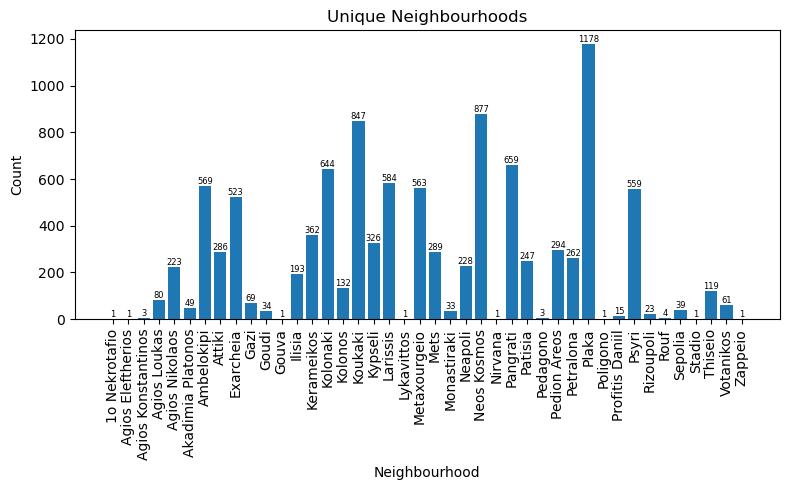


Graph of 2023


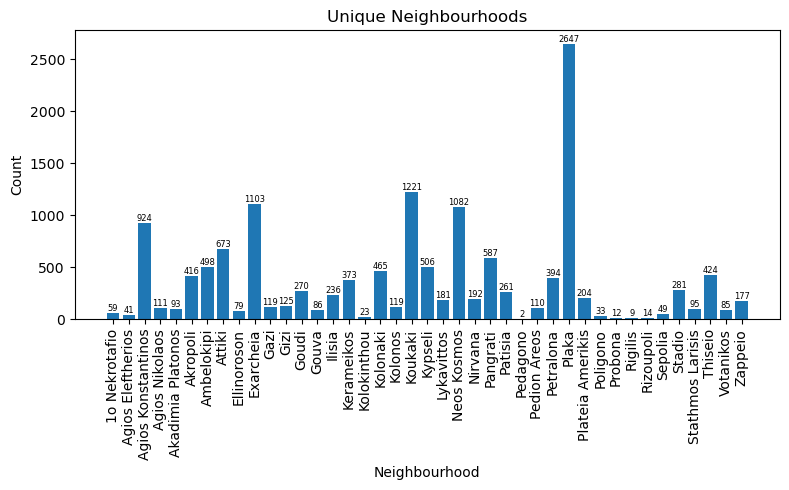

In [76]:
# Question 1.6
# Group the data by 'neighbourhood' and 'month' and count the number of unique neighborhoods

def mk_graph(df):
    temp_df = df.copy()

    temp_df.drop_duplicates(subset=['id'], inplace = True)
    properties = temp_df.groupby(['neighbourhood','month'], observed=False)['id'].count()

    neighborhood_total_counts = properties.groupby('neighbourhood', observed=False).sum()
    
    # Plot histogram
    plt.figure(figsize=(8, 5))
    plt.bar(neighborhood_total_counts.index.get_level_values('neighbourhood'), neighborhood_total_counts)

    # Rotate the x-axis labels for better readability
    plt.xticks(rotation=90)

    # Set labels and title
    plt.xlabel('Neighbourhood')
    plt.ylabel('Count')
    plt.title('Unique Neighbourhoods')

    for i, count in enumerate(neighborhood_total_counts):
        plt.text(i, count, str(count), ha='center', va='bottom', fontsize=6)

    # Show the plot
    plt.tight_layout()
    plt.show()

# 2019
print("Graph of 2019")
mk_graph(df_combined_2019)

# 2023
print("\nGraph of 2023")
mk_graph(df_combined_2023)

In [ ]:
# Question 1.7

def find_roomtypes(df):
    temp_df = df.copy()
    temp_df.drop_duplicates(subset=['id'])
    room_type_counts = temp_df.groupby('neighbourhood', observed=False)['room_type'].value_counts()


    most_common_room_type = room_type_counts.groupby('neighbourhood', observed=False).nlargest(1).reset_index(level=1, drop=True)
    # result = room_type_counts.groupby('neighbourhood').idxmax()
    # result = result.reset_index(level = 0, drop = True)
    # print(result)
    print(most_common_room_type)

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Year 2019
print("Year 2019:")
find_roomtypes(df_combined_2019)

# Year 2023
print("\nYear 2023")
find_roomtypes(df_combined_2023)

In [ ]:
# Question 1.8

def find_most_expensive_roomtype(data):
    df = pd.DataFrame(data)

    most_expensive = df.groupby('room_type')['price'].value_counts()

    result0 = 0
    result1 = 0
    result2 = 0


    for price_count  in most_expensive.items():
        if price_count[0][0] == 'Entire home/apt':
            result0 = result0 +  price_count[0][1] * price_count[1]

        if price_count[0][0] == 'Shared room':
            result1 = result1 +  price_count[0][1] * price_count[1]
        
        if price_count[0][0] == 'Private room':
            result2 = result2 +  price_count[0][1] * price_count[1]

    if result0 > result1:
        if result0 > result2:
            print('Entire home/apt',result0,'$')
        elif result0 < result2:
            print('Private room',result2,'$')
    elif result1 > result0:
        print('Shared room',result1,'$')
    
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# 2019
print("The most expensive room type for 2019:")
new_file_path = 'data_train/train_2019.csv'
data_from_2019 = pd.read_csv(new_file_path)
find_most_expensive_roomtype(data_from_2019)

# 2023
print("\nThe most expensive room type for 2023:")
new_file_path = 'data_train/train_2023.csv'
data_from_2023 = pd.read_csv(new_file_path)
find_most_expensive_roomtype(data_from_2023)


In [ ]:
# Question 1.9
def folium_map(df):

    sample_df = df.sample(n=350)

    latitude = sample_df['latitude']
    longitude = sample_df['longitude']
    room_type = sample_df['room_type']

    center_latitude = latitude.mean()
    center_longitude = longitude.mean()

    # Create the Folium map with a starting zoom level
    map = folium.Map(location=[center_latitude, center_longitude], zoom_start=12.5)

    for i in range(len(latitude)):
        lat = latitude.iloc[i]
        lon = longitude.iloc[i]
        label = str(room_type.iloc[i])
        folium.Marker([lat, lon], popup=label).add_to(map)

    # Display the map
    display(map)


# Year 2019
# print("Year 2019:")
# folium_map(df_combined_2019)

# Year 2023
print("\nYear 2023:")
folium_map(df_combined_2023)

Year 2019:
{'had', 'for', 'such', 'www', "don't", "isn't", "mustn't", 'before', 'under', 'just', "we'd", "they're", 'to', 'same', "she'll", "let's", "i'd", "that's", "couldn't", 'they', 'own', 'too', 'does', 'into', 'above', 'a', 'both', 'an', 'their', 'and', 'ought', "you've", 'else', 'our', 'hers', 'further', 'get', 'on', "shan't", 'ever', 'themselves', 'only', "they'd", "can't", 'shall', 'do', "you're", 'more', 'yours', "didn't", 'her', 'cannot', 'the', 'also', "how's", "who's", 'nor', 'then', 'would', 'it', "we've", 'whom', 'in', 'i', 'other', 'when', "wouldn't", "i'm", 'has', 'theirs', 'by', 'very', "wasn't", "won't", "why's", 'all', "he's", "we're", "doesn't", 'what', 'over', 'down', 'which', 'any', 'each', 'were', 'as', "when's", "we'll", "he'd", "she'd", 'between', 'than', 'or', 'from', 'through', 'them', 'out', 'having', 'no', 'once', 'at', 'herself', 'not', 'itself', 'during', 'r', 'like', 'therefore', 'this', 'can', 'otherwise', "they'll", 'off', "hasn't", "they've", 'we', '

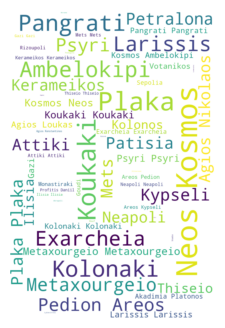

wordcloud - transit


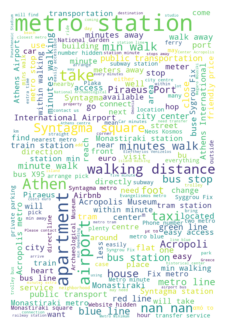

wordcloud - description


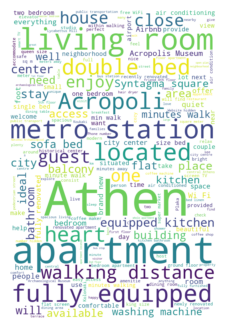

wordcloud - comments


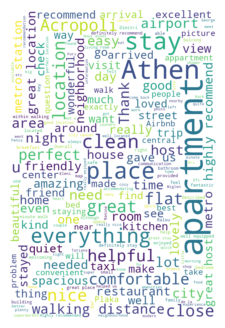

Year 2023:
{'had', 'for', 'such', 'www', "don't", "isn't", "mustn't", 'before', 'under', 'just', "we'd", "they're", 'to', 'same', "she'll", "let's", "i'd", "that's", "couldn't", 'they', 'own', 'too', 'does', 'into', 'above', 'a', 'both', 'an', 'their', 'and', 'ought', "you've", 'else', 'our', 'hers', 'further', 'get', 'on', "shan't", 'ever', 'themselves', 'only', "they'd", "can't", 'shall', 'do', "you're", 'more', 'yours', "didn't", 'her', 'cannot', 'the', 'also', "how's", "who's", 'nor', 'then', 'would', 'it', "we've", 'whom', 'in', 'i', 'other', 'when', "wouldn't", "i'm", 'has', 'theirs', 'by', 'very', "wasn't", "won't", "why's", 'all', "he's", "we're", "doesn't", 'what', 'over', 'down', 'which', 'any', 'each', 'were', 'as', "when's", "we'll", "he'd", "she'd", 'between', 'than', 'or', 'from', 'through', 'them', 'out', 'having', 'no', 'once', 'at', 'herself', 'not', 'itself', 'during', 'r', 'like', 'therefore', 'this', 'can', 'otherwise', "they'll", 'off', "hasn't", "they've", 'we', '

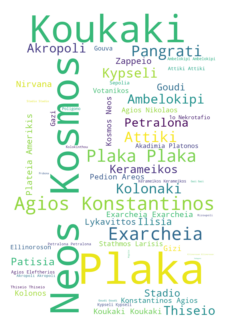

wordcloud - description


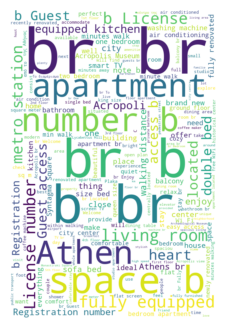

wordcloud - comments


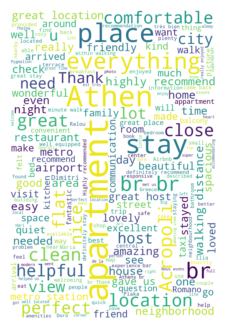

In [104]:
# Question 1.10

def wc_create(df, suffix=''):

    stopwords = STOPWORDS


    wc = WordCloud(
        background_color = 'white',
        stopwords=stopwords,
        height = 1080,
        width = 720
    )
    
    if 'neighbourhood' in df.columns:
        neighbourhood_text = ' '.join(df['neighbourhood'].astype(str))
        wc.generate(neighbourhood_text)
        plt.figure(figsize=(5, 4))
        plt.imshow(wc, interpolation='bilinear')
        plt.axis('off')
        print("wordcloud - neighbourhood")
        plt.show()
        wc.to_file(f'wordclouds/neighbourhood_{suffix}.png')
        
    if 'transit' in df.columns:
        transit_text = ' '.join(df['transit'].astype(str))
        wc.generate(transit_text)
        plt.figure(figsize=(5, 4))
        plt.imshow(wc, interpolation='bilinear')
        plt.axis('off')
        print("wordcloud - transit")
        plt.show()
        wc.to_file(f'wordclouds/transit_{suffix}.png')
        
    if 'description' in df.columns:
        description_text = ' '.join(df['description'].astype(str))
        wc.generate(description_text)
        plt.figure(figsize=(5, 4))
        plt.imshow(wc, interpolation='bilinear')
        plt.axis('off')
        print("wordcloud - description")
        plt.show()
        wc.to_file(f'wordclouds/description_{suffix}.png')

    if 'comments' in df.columns:
        review_text = ' '.join(df['comments'].astype(str))
        wc.generate(review_text)
        plt.figure(figsize=(5, 4))
        plt.imshow(wc, interpolation='bilinear')
        plt.axis('off')
        print("wordcloud - comments")
        plt.show()
        wc.to_file(f'wordclouds/review_{suffix}.png')

# Year 2019
print("Year 2019:")
wc_create(df_combined_2019, suffix='2019')

# Year 2023
print("Year 2023:")
wc_create(df_combined_2023, suffix='2023')

In [ ]:
# Question 1.11 
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

def clean_amenities(df):

    
    categories = {
        "kitchen": ["Kitchen", "Microwave", "Coffee maker", "Refrigerator", "Dishwasher", "Dishes and silverware", "Cooking basics", "Oven", "Stove",\
                    "Full kitchen", "BBQ grill"],
        "accessibility": ["Elevator", "Buzzer/wireless intercom","Patio or balcony", "Wide doorway", "Step-free access", "Wide clearance to bed", "Accessible-height bed",\
                          "Wide hallway clearance", "Flat path to front door", "Wide entryway", "Flat path to front door", "Well-lit path to entrance",\
                            "Accessible-height toilet", "Wide clearance to shower", "Wheelchair accessible"],
        "Electricity_and_Technology": ["TV", "Cable TV", "Internet", "Wifi", "Ethernet connection", "Pocket wifi"],
        "facilities": ["Air conditioning", "Heating", "Hot water", "Washer", "Dryer", "High chair", "Bathtub", "Indoor fireplace", "Private living room", "Crib",\
                       "Hot tub", "toilet"],
        "kids_friendly": ["Family/kid friendly", "Children’s books and toys", "Game console"],
        "security": ["First aid kit", "Safety card", "Fire extinguisher", "Smoke detector", "Carbon monoxide detector", "Lock on bedroom door", "Lockbox"],
        "essentials": ["Essentials", "Shampoo", "Extra pillows and blankets","Bed linens","Room-darkening shades","Handheld shower head"],
        "services": ["24-hour check-in", "Hangers", "Hair dryer", "Iron", "Laptop friendly workspace", "Luggage dropoff allowed", "Host greets you", "Pack ’n Play/travel crib",\
                     "Long term stays allowed","Free parking on premises", "Breakfast", "Free street parking", "Building staff", "Doorman"],
        "extra": ["Cleaning before checkout","Other", "Single level home", "Self check-in", "Smoking allowed", "Pets allowed",  "Paid parking off premises",  "Paid parking on premises"],
        "error": ["translation missing: en.hosting_amenity_49", "translation missing: en.hosting_amenity_50", ]
    }
    
    simplified_amenities_list = []
    for amenity_str in df['amenities']:
        amenity_list = amenity_str[1:-1].split(",")  # Assuming curly braces exist
        simplified_list = []
        for amenity in amenity_list:
            amenity = amenity.strip().strip('"')  # Remove leading/trailing spaces and quotes
            for category, types in categories.items():
                if amenity in types:
                    simplified_list.append(category)
                    break
        simplified_amenities_list.append(simplified_list)

    df['simplified_amenities'] = simplified_amenities_list

    # prepei meta na ginei amenities = simplified_amenities
    # print(df['simplified_amenities'])

    # Flatten the list of lists
    flattened_amenities = [item for sublist in df['simplified_amenities'] for item in sublist]
    
    # Count the frequency of each amenity category
    category_counts = {category: flattened_amenities.count(category) for category in set(flattened_amenities)}

    # Plot the histogram with annotations
    plt.figure(figsize=(10, 6))
    bars = plt.bar(category_counts.keys(), category_counts.values(), color='skyblue', edgecolor='black')

    # Annotate each bar with its frequency
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2.0, height, f'{height}', ha='center', va='bottom')
    # Plot the histogram
    # plt.hist(flattened_amenities, bins=len(set(flattened_amenities)), color='skyblue', edgecolor='black')
    plt.xlabel('Amenities')
    plt.ylabel('Frequency')
    plt.title('Histogram of Simplified Amenities')
    plt.xticks(rotation=90, ha='right')
    plt.tight_layout()
    plt.show()

    # print(df['amenities'])

# Year 2019
print("Year 2019:")
clean_amenities(df_combined_2019)

# Year 2023
print("Year 2023:")
clean_amenities(df_combined_2023)

Year 2019:
Expensive areas: ['Akropoli', 'Monastiraki', 'Neos Kosmos', 'Plaka']

Moderate areas: ['1o Nekrotafio', 'Kolonaki', 'Koukaki', 'Pedagono', 'Profitis Daniil', 'Psyri', 'Thiseio']

Cheap areas:  ['Agios Konstantinos', 'Agios Loukas', 'Agios Nikolaos', 'Akadimia Platonos', 'Ambelokipi', 'Attiki', 'Ellinoroson', 'Exarcheia', 'Gazi', 'Goudi', 'Gouva', 'Ilisia', 'Kerameikos', 'Kolonos', 'Kypseli', 'Larissis', 'Lykavittos', 'Metaxourgeio', 'Mets', 'Neapoli', 'Nirvana', 'Pangrati', 'Patisia', 'Pedion Areos', 'Petralona', 'Rizoupoli', 'Sepolia', 'Stadio', 'Votanikos', 'Zappeio']


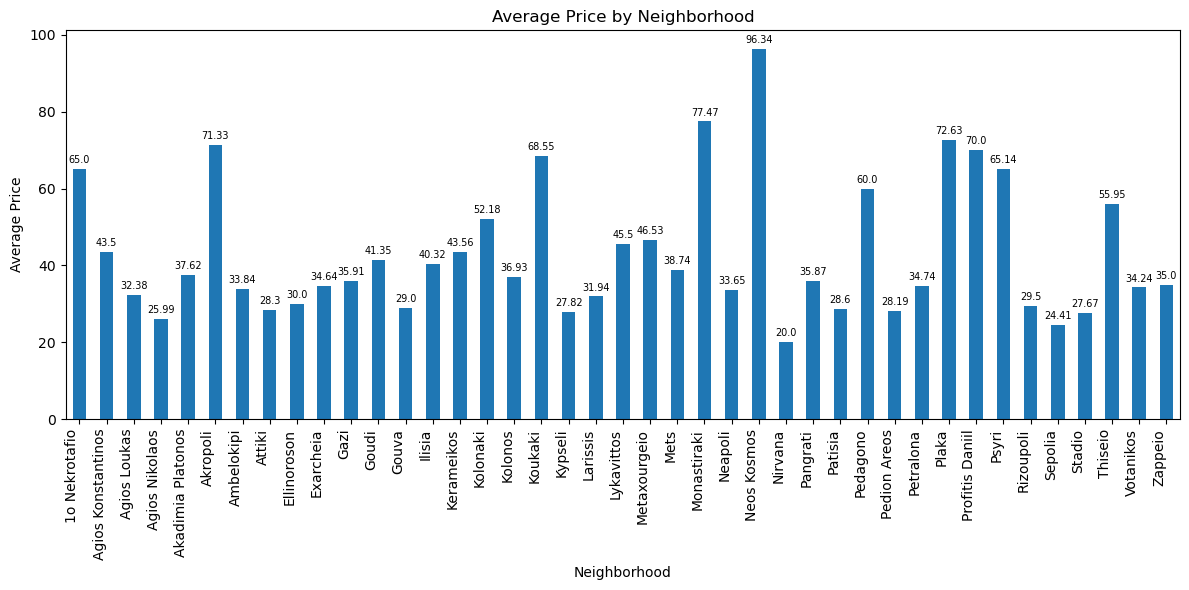

Year 2023:
Expensive areas: ['1o Nekrotafio', 'Agios Eleftherios', 'Akropoli', 'Ellinoroson', 'Exarcheia', 'Ilisia', 'Kerameikos', 'Kolonaki', 'Koukaki', 'Lykavittos', 'Neos Kosmos', 'Pangrati', 'Plaka', 'Rigilis', 'Thiseio', 'Zappeio']

Moderate areas: ['Agios Konstantinos', 'Ambelokipi', 'Gazi', 'Goudi', 'Petralona', 'Stadio']

Cheap areas:  ['Agios Nikolaos', 'Akadimia Platonos', 'Attiki', 'Gizi', 'Gouva', 'Kolokinthou', 'Kolonos', 'Kypseli', 'Nirvana', 'Patisia', 'Pedion Areos', 'Plateia Amerikis', 'Poligono', 'Probona', 'Rizoupoli', 'Sepolia', 'Stathmos Larisis', 'Votanikos']


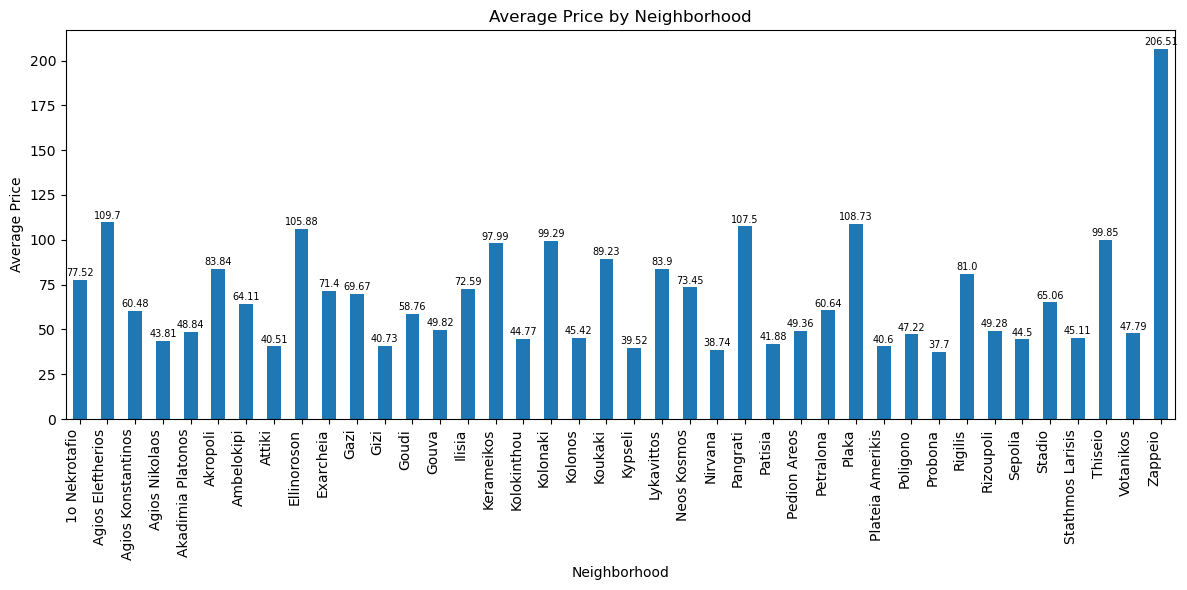

In [98]:
# Question 1.12
def gather_prices(df):
    temp_df = df.copy()
    temp_df = temp_df.drop(temp_df[temp_df['accommodates'] != 2].index)
    average_price = temp_df.groupby('neighbourhood')['price'].mean()
    
    expensive = []
    moderate = []
    cheap = []

    for neighbourhood, price in average_price.items():
        if price > 70:
            expensive.append(neighbourhood)
        elif price < 50:
            cheap.append(neighbourhood)
        else:
            moderate.append(neighbourhood)

    print("Expensive areas:", expensive)
    print("\nModerate areas:", moderate)
    print("\nCheap areas: ", cheap)

    ################################################# graph
    plt.figure(figsize=(12, 6))
    plot = average_price.plot(kind='bar')
    plt.title('Average Price by Neighborhood')
    plt.xlabel('Neighborhood')
    plt.ylabel('Average Price')
    plt.xticks(rotation=90, ha='right')
    
    for i, v in enumerate(average_price):
        plot.text(i, v + 1, str(round(v, 2)), ha='center', va='bottom', fontsize=7)

    plt.tight_layout()
    plt.show()
    ################################################# graph

# Year 2019
print("Year 2019:")
gather_prices(df_combined_2019)

# Year 2023
print("Year 2023:")
gather_prices(df_combined_2023)

In [103]:
# Question 1.13


# Number of reviews for each apartment and its review score rating
# Group by id so we dont count the same apartment in each month

def review_stats(df):
    reviews = df.groupby('id').agg({'number_of_reviews': 'count', 'review_scores_rating': 'mean'}).dropna()
    # print(reviews)
    return reviews

# Year 2019
print("Number of reviews and review score rating of each apartment for the year 2019:")
print("Disclaimer: Review score rating up to 100")
reviews_2019 = review_stats(df_combined_2019)

# Year 2023
print("Number of reviews and review score rating of each apartment for the year 2023:")
print("Disclaimer: Review score rating up to 5")
reviews_2023 = review_stats(df_combined_2023)

###
# See the average difference of review scores between years 2019 and 2023
# Merge the DataFrames on 'listing_id'

# Calculate the total number of reviews and the total score rating for all apartments in 2019
total_reviews_2019 = reviews_2019['number_of_reviews'].sum()
total_score_rating_2019 = reviews_2019['review_scores_rating'].sum()
average_2019 = total_score_rating_2019/total_reviews_2019


# Calculate the total number of reviews and the total score rating for all apartments in 2019
total_reviews_2023 = reviews_2023['number_of_reviews'].sum()
total_score_rating_2023 = reviews_2023['review_scores_rating'].sum()
average_2023 = total_score_rating_2023/total_reviews_2023

print("\nTotal score rating for all apartments in 2019:", total_score_rating_2019)
print("Total score rating for all apartments in 2023:", total_score_rating_2023)


print("\nTotal number of reviews made in 2019:", total_reviews_2019)
print("Total number of reviews made in 2023:", total_reviews_2023)

# Format the avarage review score to display only the first three decimal places
average_2019 = "{:.3f}".format(average_2019)
average_2023 = "{:.3f}".format(average_2023)

print("\nAverage review score of 2019 is:", average_2019)
print("Average review score of 2023 is:", average_2023)

###
# Function that returns the most common property type of a year
def most_common_property_type(df_combined):
    result = df_combined['property_type'].value_counts()
    print(result)

# Year 2019
print("For 2019 the number of different property types is:")
room_type = most_common_property_type(df_combined_2019)

# Year 2023
print("\nFor 2023 the number of different property types is:")
room_type = most_common_property_type(df_combined_2023)



Number of reviews and review score rating of each apartment for the year 2019:
Disclaimer: Review score rating up to 100
Number of reviews and review score rating of each apartment for the year 2023:
Disclaimer: Review score rating up to 5

Total score rating for all apartments in 2019: 734602.1666666666
Total score rating for all apartments in 2023: 56696.495

Total number of reviews made in 2019: 21764
Total number of reviews made in 2023: 31700

Average review score of 2019 is: 33.753
Average review score of 2023 is: 1.789
For 2019 the number of different property types is:
property_type
Apartment                  24099
House                       1053
Serviced apartment           591
Loft                         486
Condominium                  478
Hotel                        356
Bed and breakfast            204
Aparthotel                   197
Boutique hotel               146
Other                        104
Townhouse                    103
Hostel                        66
Guesth

In [101]:
# Question 1.14

def top_hosts(df):
    temp_df = df.copy()

    temp_df.drop_duplicates(subset=['id'], inplace = True)
    # Group by host_id and count number of properties for each host
    host_listings_count = temp_df.groupby(['host_id','host_name'])['id'].count().reset_index()

    # Sort results based on number of properties
    host_listings_count_sorted = host_listings_count.sort_values(by='id', ascending=False)

    # Top 10 hosts with the most properties
    top_10_hosts = host_listings_count_sorted.head(10)
    
    # Rename the 'listing_id' column to 'property_count'
    top_10_hosts.rename(columns={'id': 'property_count'}, inplace=True)

    # Results
    print(top_10_hosts.to_string(index=False))

# Year 2019
print("Top 10 hosts for 2019:")
top_hosts(df_combined_2019)

#Year 2023
print("\nTop 10 hosts for 2023:")
top_hosts(df_combined_2023)

Top 10 hosts for 2019:
  host_id                     host_name  property_count
 77457889                    Παναγιώτης             126
 29927830 Dimitris, Konstantinos & Sevi              96
135482892                          Home              86
   748818                        George              80
  1621474                  Eazybnb Team              72
  1418201                          Dean              63
112527018                          Toni              57
 65714690                          Home              48
  2718115    Alex & Maria | Preffered |              46
149346682                          King              45

Top 10 hosts for 2023:
  host_id        host_name  property_count
 20104194         Upstreet             116
 29927830           Homm ®             115
113548208              Mgv              90
 90390850      Evan&Anetta              89
   748818           George              76
182156346         Maryland              68
  2089542       Tia & Mike          